**Thinkful - Drill 2.4.2 - Multivariable Regression Data Prep**

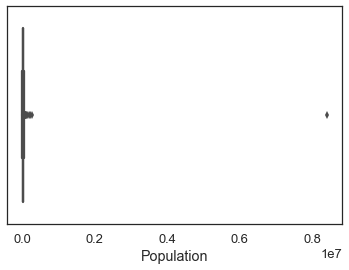

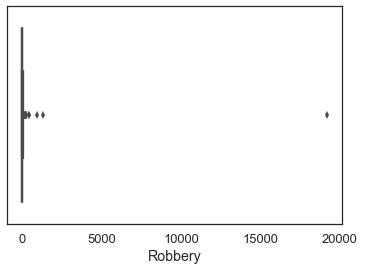

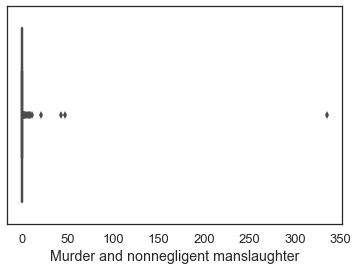

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
 
#Read file and remove commas from numbers (currently strings)
df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv')
df['Population'] = df['Population'].map(lambda x: ''.join(list(filter(str.isdigit, str(x)))))
df['Robbery'] = df['Robbery'].map(lambda x: ''.join(list(filter(str.isdigit, str(x)))))

#Convert strings to integers and read into file
df['Population'] = list(map(int, df['Population']))
df['Robbery'] = list(map(int, df['Robbery']))
df['Murder and nonnegligent manslaughter'] = list(map(int, df['Murder and nonnegligent manslaughter']))

#Create variables
population = df['Population']
robbery = df['Robbery']
murder = df['Murder and nonnegligent manslaughter']

#Plot variables
sns.boxplot(population)
plt.show()

sns.boxplot(robbery)
plt.show()

sns.boxplot(murder)
plt.show()

It appears that there is a major outlier for all three categories. Sorting by population shows that this outlier is New York. We know that New York is a pretty large city, and therefore it is probably not an outlier that should be removed.

In [55]:
df.sort_values('Population', ascending=False)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
216,New York,8396126,"52,384",335,NaN,"1,112",19170,"31,767","141,971","16,606","117,931","7,434",NaN
35,Buffalo,258789,"3,249",47,NaN,145,1322,"1,735","12,491","3,458","8,076",957,NaN
272,Rochester,210562,"2,107",42,NaN,92,918,"1,055","10,051","2,587","6,855",609,132.0
346,Yonkers,199134,"1,036",6,NaN,25,390,615,"2,368",470,"1,662",236,10.0
310,Syracuse,143834,"1,192",21,NaN,75,400,696,"6,473","1,781","4,298",394,57.0
7,Amherst Town,118296,107,1,NaN,7,31,68,"2,118",204,"1,882",32,3.0
3,Albany,97956,791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
126,Greece Town,96667,151,0,NaN,9,60,82,"2,303",332,"1,925",46,NaN
267,Ramapo Town,87204,57,2,NaN,5,9,41,567,88,466,13,NaN
57,Clarkstown Town,80705,65,0,NaN,8,17,40,"1,515",99,"1,388",28,NaN


**Creating Categorical variables for 'Murder' and 'Robbery'**

In [57]:
#Create Categorical Variable for murder data and append to dataframe
Murder_Bool = []
for i in range(len(murder)):
    if murder[i]>0:
        Murder_Bool.append(1)
    else:
        Murder_Bool.append(0)
df['Murder Boolean'] = pd.Series(Murder_Bool, index=df.index)

#Create Categorical Variable for robbery data and append to dataframe
Robbery_Bool = []
for i in range(len(robbery)):
    if robbery[i]>0:
        Robbery_Bool.append(1)
    else:
        Robbery_Bool.append(0)
df['Robbery Boolean'] = pd.Series(Robbery_Bool, index=df.index)
df

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Murder Boolean,Robbery Boolean
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0,0,0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0,0,0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0,0,0
3,Albany,97956,791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN,1,1
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN,0,1
5,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN,0,1
6,Allegany Village,1781,3,0,NaN,0,0,3,10,0,10,0,0.0,0,0
7,Amherst Town,118296,107,1,NaN,7,31,68,"2,118",204,"1,882",32,3.0,1,1
8,Amityville Village,9519,9,0,NaN,2,4,3,210,16,188,6,1.0,0,1
9,Amsterdam,18182,30,0,NaN,0,12,18,405,99,291,15,0.0,0,1
